# 01. Electricity Load Diagrams – Data Loading & Initial Exploration

## Objective

This notebook performs the following tasks:
- Load the Electricity Load Diagrams dataset from a local Parquet file (downloaded and normalized from the UCI repository).
- Transform the raw data into a time-series format.
- Conduct preliminary checks on data structure and quality (e.g., missing values and zero entries).
- Perform light exploratory visualizations to better understand electricity consumption patterns.

## 1. Setup and Imports

In [3]:
# Core (in requirements.txt)
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Add the root directory to the path so Python can find the 'src' module
import os
import sys
sys.path.append(os.path.abspath('../'))
from src.data_loader import load_raw_data

# Display configuration
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Check Python version (Requires 3.10.11 as specified in .python-version)
print(f"Python version: {sys.version}")

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


## 2. Load Dataset – via `src/data_loader.py`

Instead of using `load_dataset` from Hugging Face — which caused script-related errors — the dataset was downloaded using `scripts/download_data.py`.  
This script generates the file `electricity_data.parquet`, which is then loaded into a pandas DataFrame by `src/data_loader.py`.


In [4]:
# Call the function from src/data_loader.py
try:
    df = load_raw_data()
except Exception as e:
    print(f"❌ Error: {e}")

👉 Loading: C:\Users\YOGA\Desktop\01_Time Series\PROJECT\Github\Electricity-Load-Diagrams\data\raw\electricity_data.parquet
✅ Data loaded successfully!
📊 Samples: 140256
👥 Number of customers: 370
🕒 Time span: 2011-01-01 00:15:00 → 2015-01-01 00:00:00


## 3. Data Inspection

In [5]:
# Check data types and overall memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


The final five rows of the dataset are examined for a subset of the data (`MT_001`–`MT_010`), in order to verify the data structure and inspect recent electricity consumption values.

In [6]:
print(f"Index data type: {df.index.dtype}")
print(f"Current first column: {df.columns[0]}")

# Select the first 10 customer columns
first_10_customers = df.columns[:10]
df_10 = df[first_10_customers]

df_10.tail()

Index data type: datetime64[ns]
Current first column: MT_001


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010
Timestamp,,,,,,,,,,
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.175240,249.158249,62.937063,69.892473


## 4. Data Quality Check

Electricity load datasets frequently include periods with zero-valued observations.  
These intervals often arise when customer metering devices have not yet been installed or were temporarily inactive, and therefore require careful consideration during data quality assessment.

In [7]:
# 1. Check for missing values (NaN)
missing = df.isnull().sum().sum()
print(f"Total number of NaN values: {missing}")

# 2. Check for zero values (a characteristic of this dataset)
zeros_count = (df == 0).sum().sum()
total_cells = df.size
print(f"Total number of zero values: {zeros_count} ({zeros_count / total_cells:.2%})")

# 3. Basic descriptive statistics for a few columns
df.iloc[:, :5].describe()

Total number of NaN values: 0
Total number of zero values: 10457342 (20.15%)


,MT_001,MT_002,MT_003,MT_004,MT_005
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309
std,5.983965,13.272415,11.014456,58.248392,26.461327
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659
50%,1.269036,24.893314,1.737619,87.398374,39.024390
75%,2.538071,29.871977,1.737619,115.853659,54.878049
max,48.223350,115.220484,151.172893,321.138211,150.000000


## 5. Visual Exploration

To explore temporal consumption patterns, the electricity load profile of a representative customer (`MT_001`) is visualized over the final days of available data.  
This visualization facilitates the identification of short-term dynamics and recurring daily consumption cycles at a 15-minute resolution.

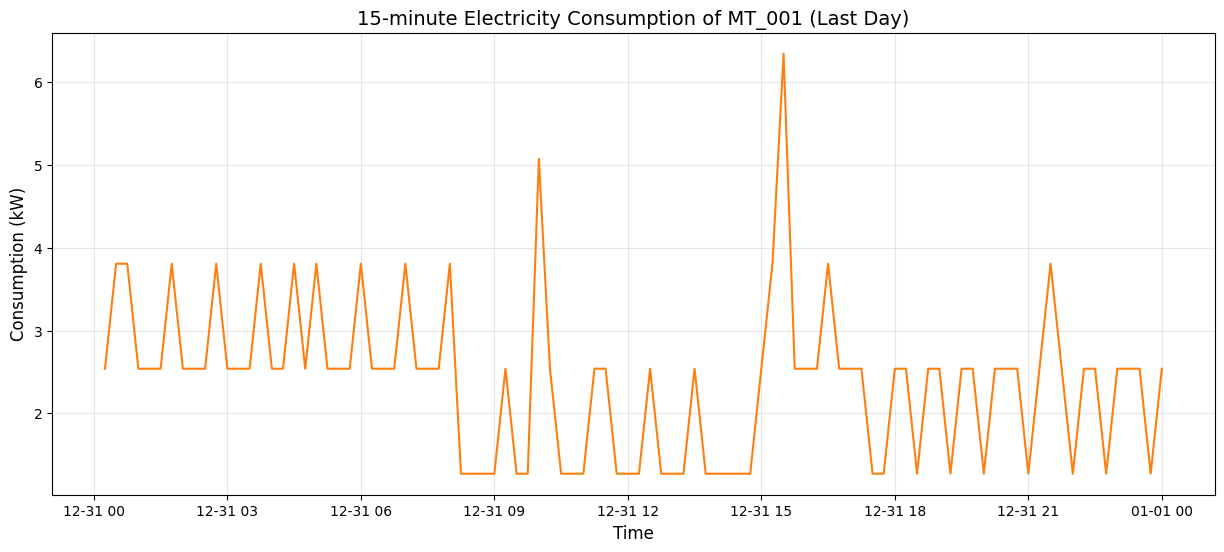

In [8]:
sample_client = 'MT_001'

# Plot last 1 day (96 points)
plt.figure(figsize=(15, 6))
plt.plot(df[sample_client].tail(96), color='tab:orange', linewidth=1.5)
plt.title(f'15-minute Electricity Consumption of {sample_client} (Last Day)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Consumption (kW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

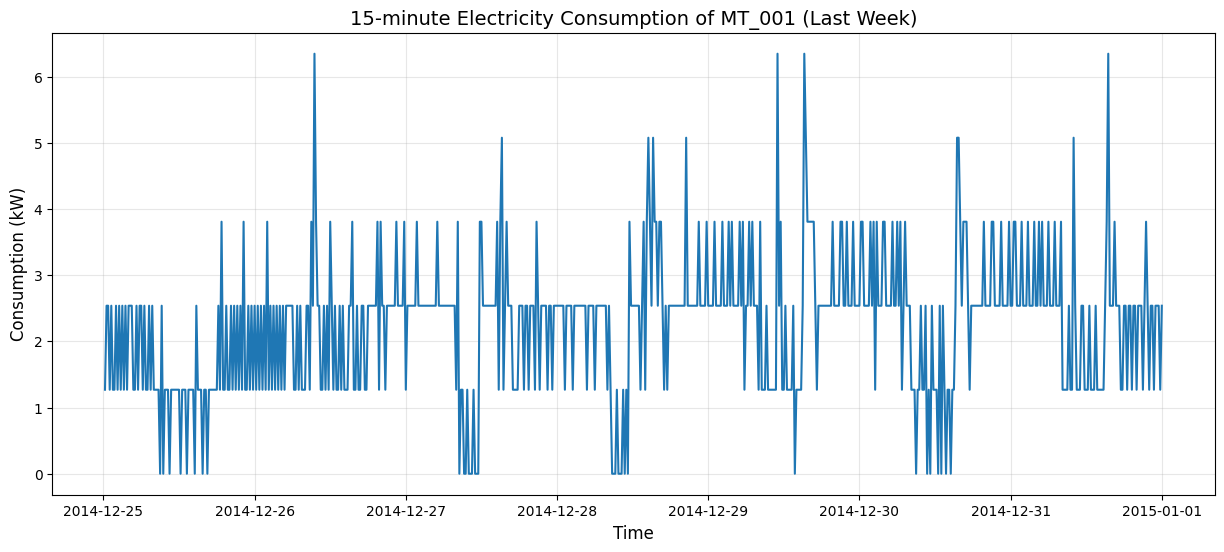

In [9]:
# Plot the last week (96 points/day * 7)
plt.figure(figsize=(15, 6))
plt.plot(df[sample_client].tail(96 * 7), color='tab:blue', linewidth=1.5)
plt.title(f'15-minute Electricity Consumption of {sample_client} (Last Week)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Consumption (kW)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 7. Preliminary Conclusion

- **Data types:** The dataset is indexed by a timestamp variable, sorted in ascending chronological order. All remaining columns are of floating-point type and represent electricity consumption values. The column `MT_001` corresponds to the first customer load profile.

- **Structure:** The dataset comprises 140,256 time observations recorded at a 15-minute resolution for 370 residential electricity consumers.

- **Data quality:** No missing values (`NaN`) are present in the dataset. However, a substantial proportion of zero-valued observations is observed, reflecting staggered customer onboarding and periods prior to meter installation. Additionally, the consumption signal is notably noisy at a 15-minute resolution, suggesting that additional preprocessing or smoothing may be required to reveal more stable consumption patterns.

- **Next steps:** Subsequent analysis will be conducted in `02_eda.ipynb`, with a focus on identifying and characterizing seasonal patterns at daily, weekly, and annual time scales.

---

**Next Notebook:** [02_eda.ipynb](02_eda.ipynb) - Exploratory Data Analysis